In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
##Initial Parameters
twopi=2.*np.pi
yearsc=3.1557*10**7
bconst=-3000.   ##Myr
#K=8.88*10**-29   ##PK??
#K=2.07*10**-39   ##Ostriker & Gunn 1969
#K=2*twopi*2.5*10**-49  ##Unit is year/Gauss^2
K=9.87*10**-48
Bbot=5.*10**7

P=[]; B0=[]
##Initialize the B-field and Spin period for newborn NS
for k in range(800):
    x=0; y=0
    ##Initialize Spin
    u1=np.random.random_sample()
    #print u1
    u2=np.random.random_sample()
    s=np.sqrt(-2.*np.log(1.-u1))*np.cos(twopi*u2)
    s=0.7*s-0.6
    if -1.5<s and s<0.013:
        x=10.**s
    
    ##Initialize B-field
    u1=np.random.random_sample()
    u2=np.random.random_sample()
    s=np.sqrt(-2.*np.log(1.-u1))*np.cos(twopi*u2)
    s=0.68*s+12.6
    if 11.5<=s and s<=13.8:
        y=10.**s
        
    if x!=0 and y!=0:
        P.append(x); B0.append(y)

P=np.asarray(P); B0=np.asarray(B0)
Pyear=P/yearsc

##Death line
dl=np.logspace(-4.0, 2.0, num=50)
#print dl

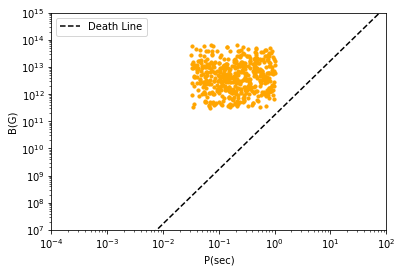

In [3]:
plt.figure()
plt.scatter(P, B0, color='orange', s=10)
plt.plot(dl, (dl**2)*(0.17*10**12), 'k--', label='Death Line') ##Death line
#plt.text(10., 10.**14, 'Death Line')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-4, 10**2)
plt.ylim(10**7, 10**15)
plt.xlabel('P(sec)')
plt.ylabel('B(G)')
plt.legend(loc='upper left')

plt.show()

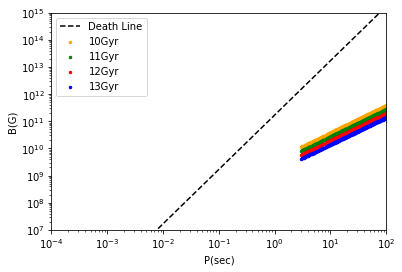

In [6]:
##Evole the NS
t=np.arange(0., 14000., 1.)  ##The time step is considered to be in one million year. So that 14000 is 12 Gyr.
co=['orange', 'green', 'red', 'blue','purple']
la=['10Gyr','11Gyr', '12Gyr', '13Gyr', '14Gyr']
count=0
plt.figure()
for j in range(0,len(t)):
    B=B0*np.exp(t[j]/bconst)+Bbot
    Pdot=K*B*B/Pyear
    #print Pdot[0]
    Pyear=Pyear+Pdot*1e6
    if t[j]==10000 or t[j]==11000 or t[j]==12000 or t[j]==13000 or t[j]==14000: 
        plt.scatter(Pyear*yearsc, B, color=co[count], s=6, label=la[count])
        count+=1
        
plt.plot(dl, (dl**2)*(0.17*10**12), 'k--', label='Death Line')  ##Death line
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**-4, 10**2)
plt.ylim(10**7, 10**15)
plt.xlabel('P(sec)')
plt.ylabel('B(G)')
#plt.title('10Gyr')
plt.legend(loc='upper left')
#plt.show()
#plt.savefig('/Users/shiye/Documents/ClusterGroup/Pulsarproject/Gyrchange_K.png', dpi=300)

In [30]:
#plt.figure()
#plt.scatter(P, B, color='orange', s=10)
#plt.plot(dl, (dl**2)*(0.17*10**12), 'k--', label='Death Line')  ##Death line
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(10**-4, 10**2)
#plt.ylim(10**7, 10**15)
#plt.xlabel('P(sec)')
#plt.ylabel('B(G)')
#plt.title('10Gyr')
#plt.legend(loc='upper left')
##plt.show()
#plt.savefig('/Users/shiye/Documents/ClusterGroup/Pulsarproject/10Gyr.png', dpi=300)